# Hotel Booking Data Analysis
This notebook contains a comprehensive analysis of the hotel booking data. The analysis includes data cleaning, preprocessing, exploratory data analysis (EDA), and predictive modeling.

## Data Loading
First, let's load the necessary libraries and the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = (r"D:\Atom bootcamp\Python\Hotel.csv")
hotel_data = pd.read_csv(file_path)
hotel_data.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Cleaning and Preprocessing
Before diving into the analysis, it's essential to clean and preprocess the data. This includes handling any anomalies and preparing the data for analysis.


In [41]:
hotel_data.columns


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [3]:
# Check for missing values
missing_values = hotel_data.isnull().sum()

# Data types of the columns
data_types = hotel_data.dtypes

# Display missing values and data types
missing_values, data_types


(Booking_ID                              0
 no_of_adults                            0
 no_of_children                          0
 no_of_weekend_nights                    0
 no_of_week_nights                       0
 type_of_meal_plan                       0
 required_car_parking_space              0
 room_type_reserved                      0
 lead_time                               0
 arrival_year                            0
 arrival_month                           0
 arrival_date                            0
 market_segment_type                     0
 repeated_guest                          0
 no_of_previous_cancellations            0
 no_of_previous_bookings_not_canceled    0
 avg_price_per_room                      0
 no_of_special_requests                  0
 booking_status                          0
 dtype: int64,
 Booking_ID                               object
 no_of_adults                              int64
 no_of_children                            int64
 no_of_weekend_nights

## Exploratory Data Analysis (EDA)
In this section, we perform an exploratory data analysis to understand the dataset better. We will look at various aspects of the data through visualizations and statistical analysis.


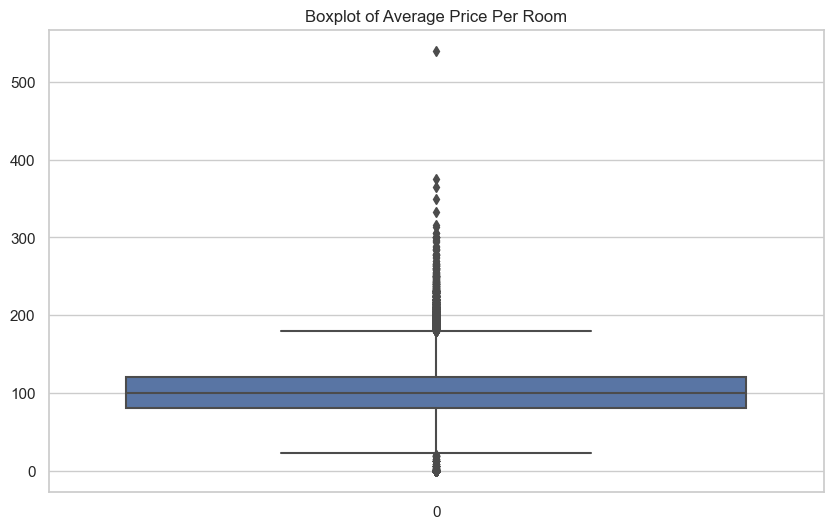

545

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# Investigating the distribution of 'avg_price_per_room'
plt.figure(figsize=(10, 6))
sns.boxplot(hotel_data['avg_price_per_room'])
plt.title('Boxplot of Average Price Per Room')
plt.show()

# Checking the number of entries with 'avg_price_per_room' as 0
zero_price_count = (hotel_data['avg_price_per_room'] == 0).sum()
zero_price_count

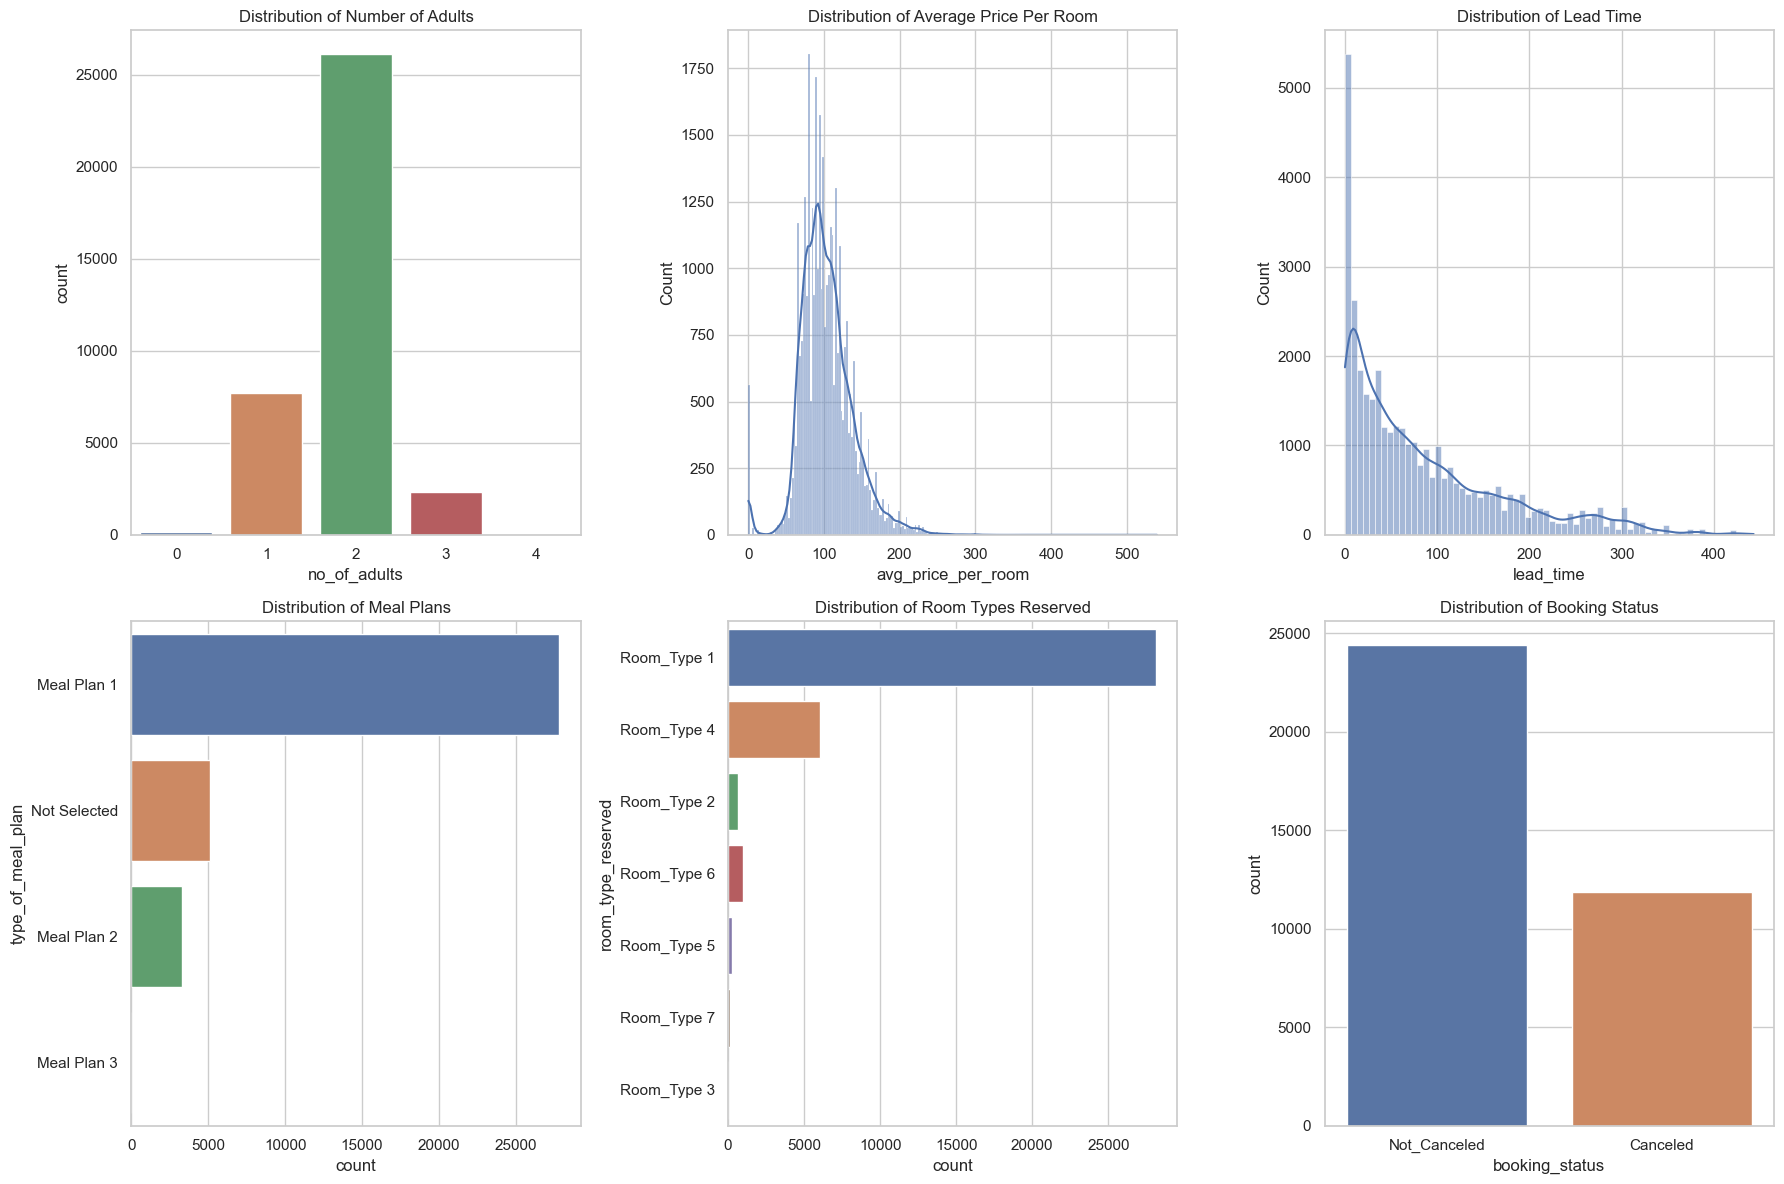

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(18, 12))

# Subplot for 'no_of_adults'
plt.subplot(2, 3, 1)
sns.countplot(data=hotel_data, x='no_of_adults')
plt.title('Distribution of Number of Adults')

# Subplot for 'avg_price_per_room'
plt.subplot(2, 3, 2)
sns.histplot(data=hotel_data, x='avg_price_per_room', kde=True)
plt.title('Distribution of Average Price Per Room')

# Subplot for 'lead_time'
plt.subplot(2, 3, 3)
sns.histplot(data=hotel_data, x='lead_time', kde=True)
plt.title('Distribution of Lead Time')

# Subplot for 'type_of_meal_plan'
plt.subplot(2, 3, 4)
sns.countplot(data=hotel_data, y='type_of_meal_plan')
plt.title('Distribution of Meal Plans')

# Subplot for 'room_type_reserved'
plt.subplot(2, 3, 5)
sns.countplot(data=hotel_data, y='room_type_reserved')
plt.title('Distribution of Room Types Reserved')

# Subplot for 'booking_status'
plt.subplot(2, 3, 6)
sns.countplot(data=hotel_data, x='booking_status')
plt.title('Distribution of Booking Status')

# Adjusting layout
plt.tight_layout()
plt.show()


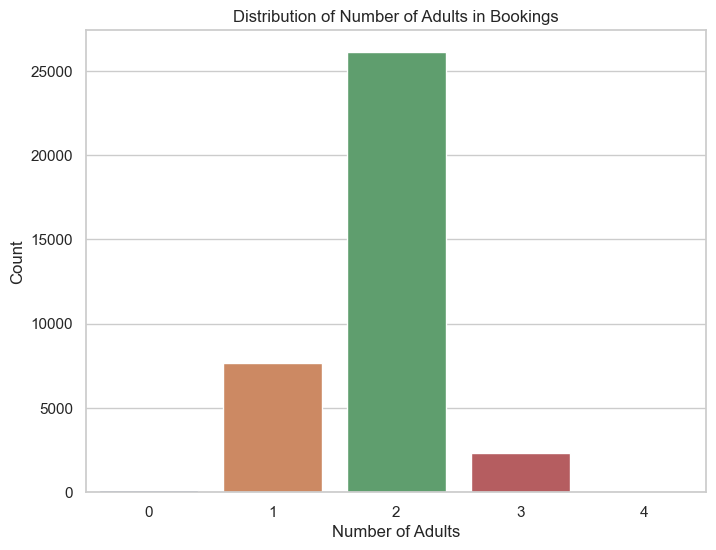

In [6]:
# Distribution of number of adults in bookings
plt.figure(figsize=(8, 6))
sns.countplot(x='no_of_adults', data=hotel_data)
plt.title('Distribution of Number of Adults in Bookings')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.show()


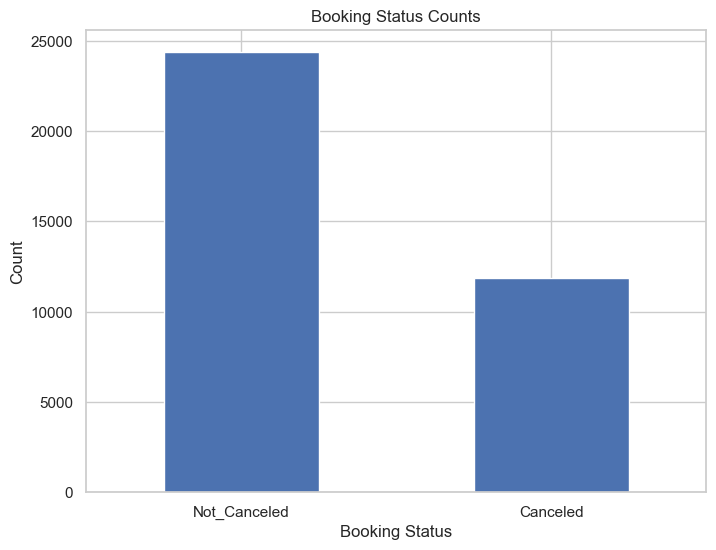

In [7]:
# Proportion of booking status
booking_status_counts = hotel_data['booking_status'].value_counts()
plt.figure(figsize=(8, 6))
booking_status_counts.plot(kind='bar')
plt.title('Booking Status Counts')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Predictive Modeling
We will implement predictive models to forecast booking cancellations. This will include setting up the data for modeling, creating the models, and evaluating their performance.


In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Assuming 'booking_status' is the column you want to predict (booking cancellations)
X = hotel_data.drop(['booking_status', 'Booking_ID', 'arrival_date'], axis=1)
y = hotel_data['booking_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize or normalize numerical features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement K-nearest neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Evaluate KNN model
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Implement Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree model
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", accuracy_dt)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Fine-tune hyperparameters using GridSearchCV for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model
y_pred_best_knn = best_knn_model.predict(X_test_scaled)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print("\nBest KNN Accuracy:", accuracy_best_knn)
print("Classification Report (Best KNN):")
print(classification_report(y_test, y_pred_best_knn))


KNN Accuracy: 0.8577532736044108
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2416
           1       0.88      0.91      0.89      4839

    accuracy                           0.86      7255
   macro avg       0.84      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255


Decision Tree Accuracy: 0.867815299793246
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2416
           1       0.90      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255


Best KNN Accuracy: 0.8556857339765679
Classification Report (Best KNN):
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2416
           1       0

## Handling Class Imbalance with SMOTE
Given the imbalance in the booking status classes, we will use the SMOTE technique to balance the dataset and then retrain our models to see if there's an improvement in performance.


In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [44]:
# Implement K-nearest neighbors (KNN) model with SMOTE
knn_model_smote = KNeighborsClassifier()
knn_model_smote.fit(X_train_smote, y_train_smote)


KNeighborsClassifier()

In [45]:
# Implement Decision Tree model with SMOTE
dt_model_smote = DecisionTreeClassifier()
dt_model_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [46]:
# Evaluate KNN model with SMOTE
y_pred_knn_smote = knn_model_smote.predict(X_test_scaled)
accuracy_knn_smote = accuracy_score(y_test, y_pred_knn_smote)
print("\nKNN Accuracy with SMOTE:", accuracy_knn_smote)
print("Classification Report (KNN with SMOTE):")
print(classification_report(y_test, y_pred_knn_smote))



KNN Accuracy with SMOTE: 0.8402481047553412
Classification Report (KNN with SMOTE):
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      2416
           1       0.91      0.84      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.82      0.84      0.83      7255
weighted avg       0.85      0.84      0.84      7255



In [47]:
# Evaluate Decision Tree model with SMOTE
y_pred_dt_smote = dt_model_smote.predict(X_test)
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
print("\nDecision Tree Accuracy with SMOTE:", accuracy_dt_smote)
print("Classification Report (Decision Tree with SMOTE):")
print(classification_report(y_test, y_pred_dt_smote))



Decision Tree Accuracy with SMOTE: 0.36140592694693313
Classification Report (Decision Tree with SMOTE):
              precision    recall  f1-score   support

           0       0.34      0.99      0.51      2416
           1       0.94      0.05      0.09      4839

    accuracy                           0.36      7255
   macro avg       0.64      0.52      0.30      7255
weighted avg       0.74      0.36      0.23      7255



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Questions for the Data
To generate insights, here are 15 questions we can ask and answer through visualizations and analysis:

1. What is the distribution of booking status (canceled vs. not canceled)?
2. How do lead times differ for canceled and not canceled bookings?
3. What are the peak months for hotel bookings?
4. Is there a relationship between the average price per room and the booking cancellation rate?
5. How do meal plans affect booking cancellations?
6. What is the trend in hotel bookings over the years?
7. Does the number of special requests correlate with cancellation rates?
8. Are repeat guests more likely to cancel their bookings?
9. What is the distribution of room types reserved, and how does it relate to cancellations?
10. How does the number of adults and children affect booking cancellations?
11. What market segments contribute most to hotel bookings, and which have higher cancellation rates?
12. Does the requirement for a car parking space influence booking cancellations?
13. How do booking trends vary with different room types?
14. What is the relationship between previous cancellations and the likelihood of future cancellations?
15. Does the average lead time vary across different market segments?

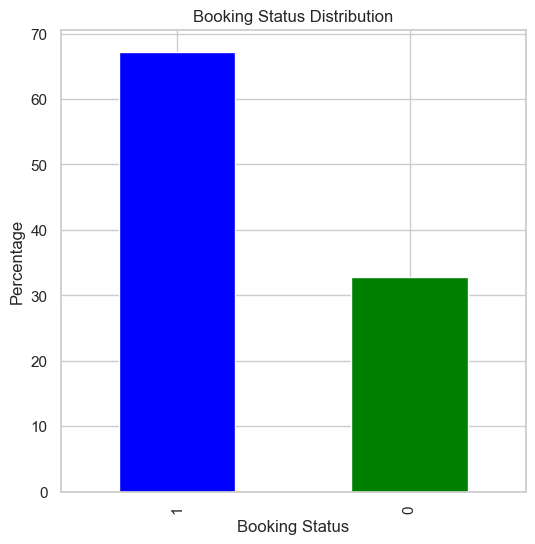

In [48]:
# 1. Distribution of Booking Status
booking_status_distribution = hotel_data['booking_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
booking_status_distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Percentage')
plt.show()


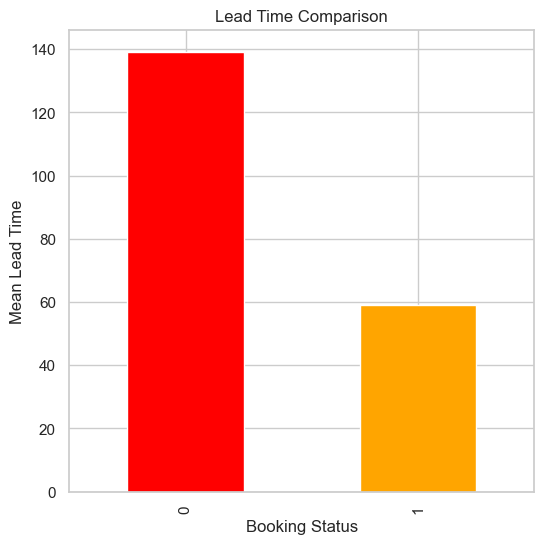

In [62]:
# 2. Lead Times for Canceled vs. Not Canceled Bookings
lead_time_comparison = hotel_data.groupby('booking_status')['lead_time'].mean()
plt.figure(figsize=(6, 6))
lead_time_comparison.plot(kind='bar', color=['red', 'orange'])
plt.title('Lead Time Comparison')
plt.xlabel('Booking Status')
plt.ylabel('Mean Lead Time')
plt.show()

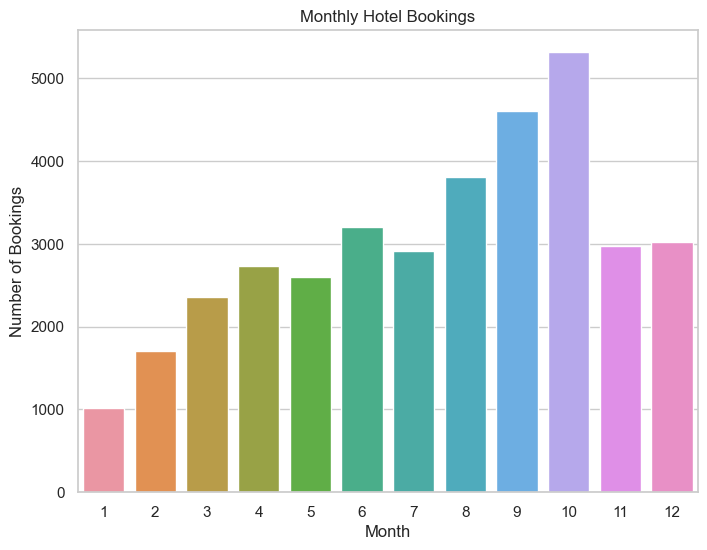

In [49]:
# 3. Peak Months for Hotel Bookings
monthly_bookings = hotel_data['arrival_month'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='arrival_month', order=monthly_bookings.index)
plt.title('Monthly Hotel Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

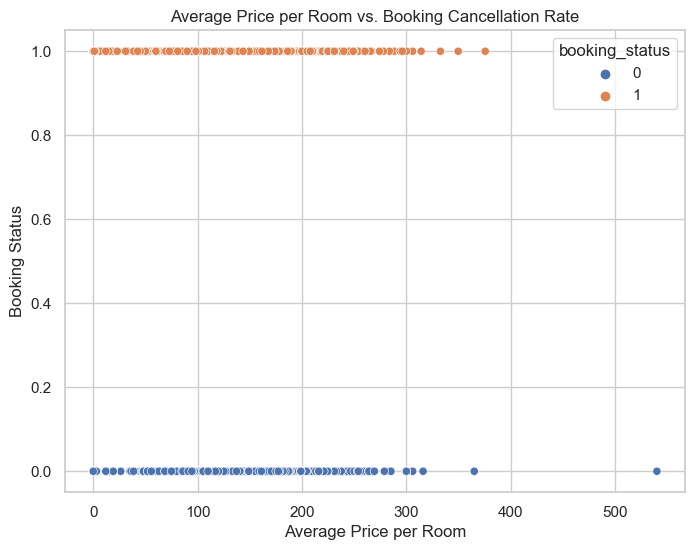

In [51]:
# 4. Relationship between Average Price per Room and Booking Cancellation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hotel_data, x='avg_price_per_room', y='booking_status', hue='booking_status')
plt.title('Average Price per Room vs. Booking Cancellation Rate')
plt.xlabel('Average Price per Room')
plt.ylabel('Booking Status')
plt.show()

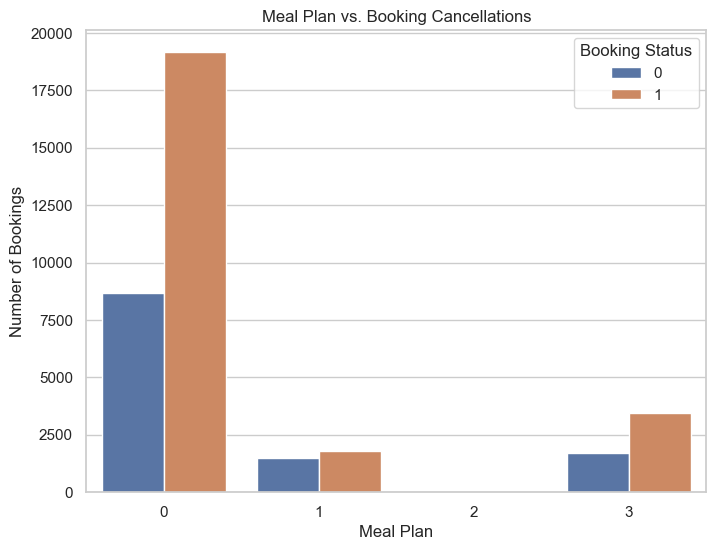

In [52]:
# 5. Effect of Meal Plans on Booking Cancellations
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='type_of_meal_plan', hue='booking_status')
plt.title('Meal Plan vs. Booking Cancellations')
plt.xlabel('Meal Plan')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()

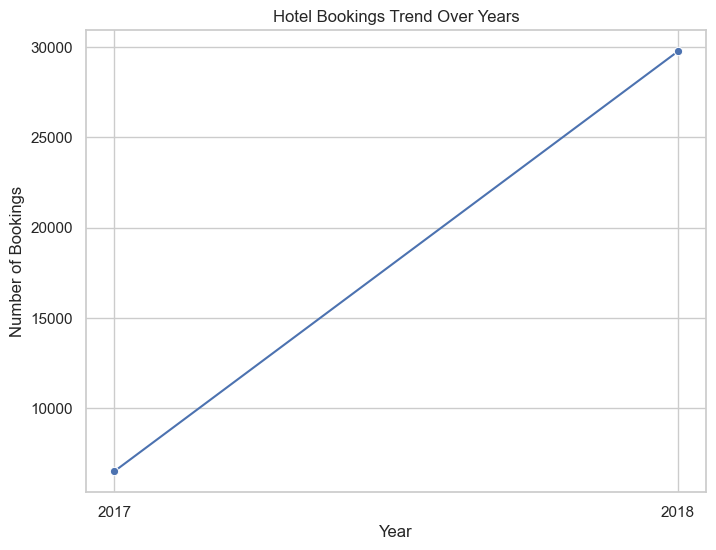

In [53]:
# 6. Trend in Hotel Bookings Over the Years
# Convert 'arrival_year' column to datetime format
hotel_data['arrival_year'] = pd.to_datetime(hotel_data['arrival_year'], format='%Y')

# Extract year from the datetime column
hotel_data['year'] = hotel_data['arrival_year'].dt.year

# Count hotel bookings per year
yearly_bookings = hotel_data['year'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=yearly_bookings, marker='o')
plt.title('Hotel Bookings Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.xticks(yearly_bookings.index)
plt.show()


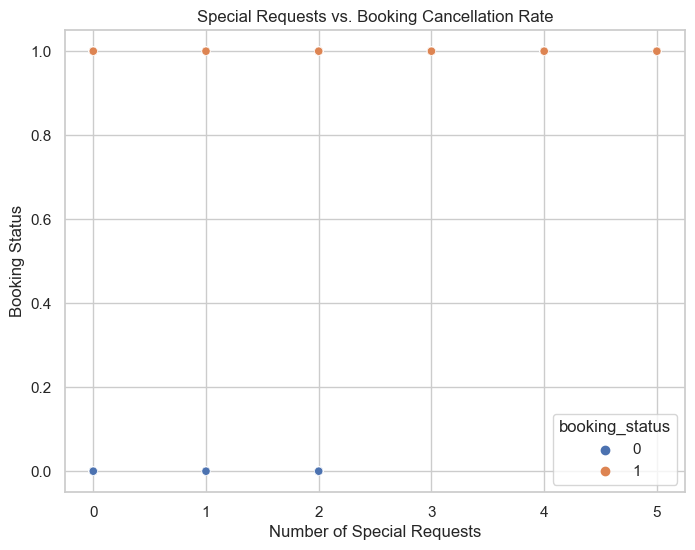

In [54]:
# 7. Correlation between Number of Special Requests and Cancellation Rates
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hotel_data, x='no_of_special_requests', y='booking_status', hue='booking_status')
plt.title('Special Requests vs. Booking Cancellation Rate')
plt.xlabel('Number of Special Requests')
plt.ylabel('Booking Status')
plt.show()

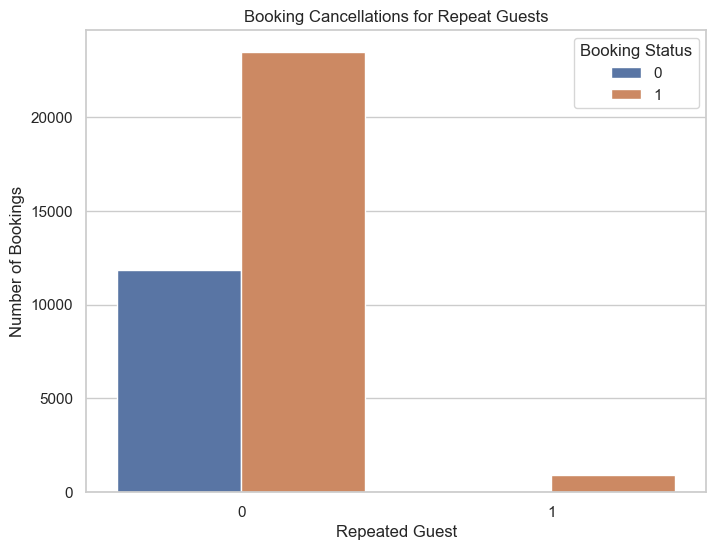

In [61]:
# 8. Likelihood of Booking Cancellations for Repeat Guests
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='repeated_guest', hue='booking_status')
plt.title('Booking Cancellations for Repeat Guests')
plt.xlabel('Repeated Guest')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()

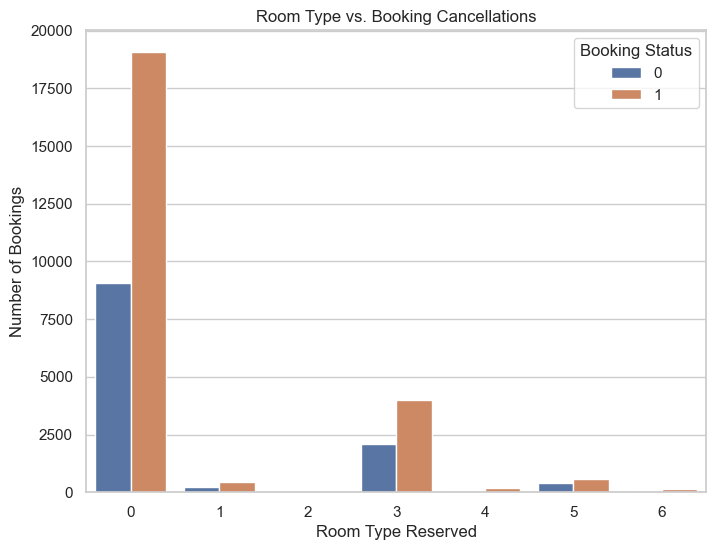

In [55]:
# 9. Distribution of Room Types Reserved and Relation to Cancellations
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='room_type_reserved', hue='booking_status')
plt.title('Room Type vs. Booking Cancellations')
plt.xlabel('Room Type Reserved')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()

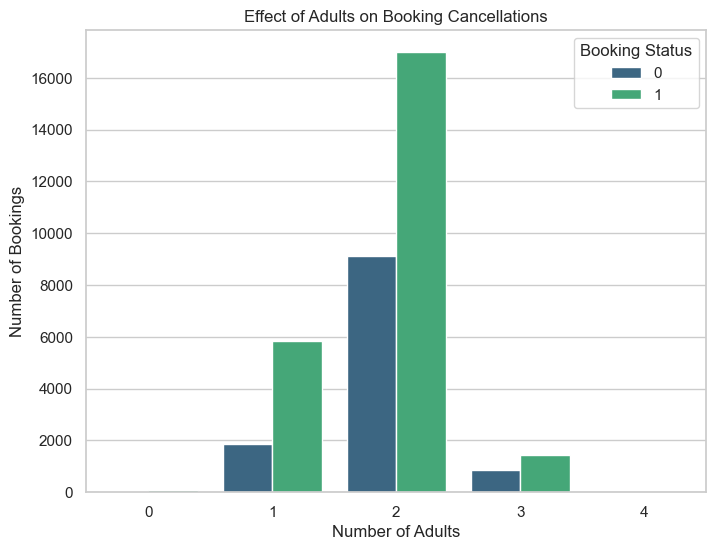

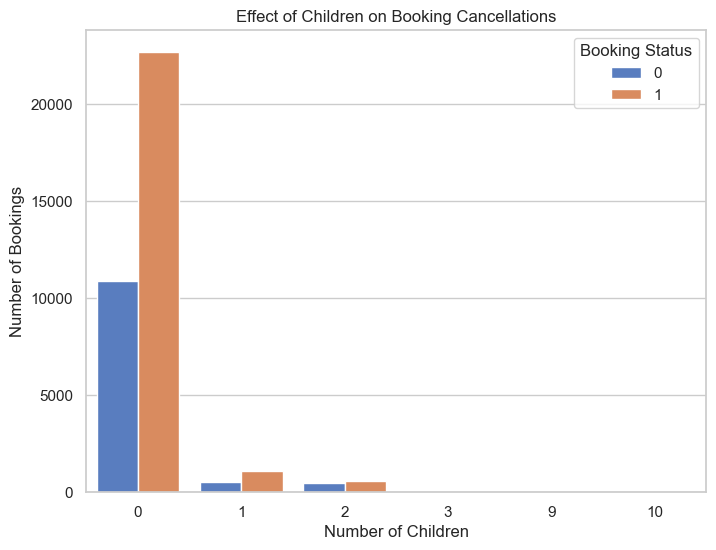

In [56]:
# 10. Effect of Number of Adults and Children on Booking Cancellations
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='no_of_adults', hue='booking_status', palette='viridis')
plt.title('Effect of Adults on Booking Cancellations')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='no_of_children', hue='booking_status', palette='muted')
plt.title('Effect of Children on Booking Cancellations')
plt.xlabel('Number of Children')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()


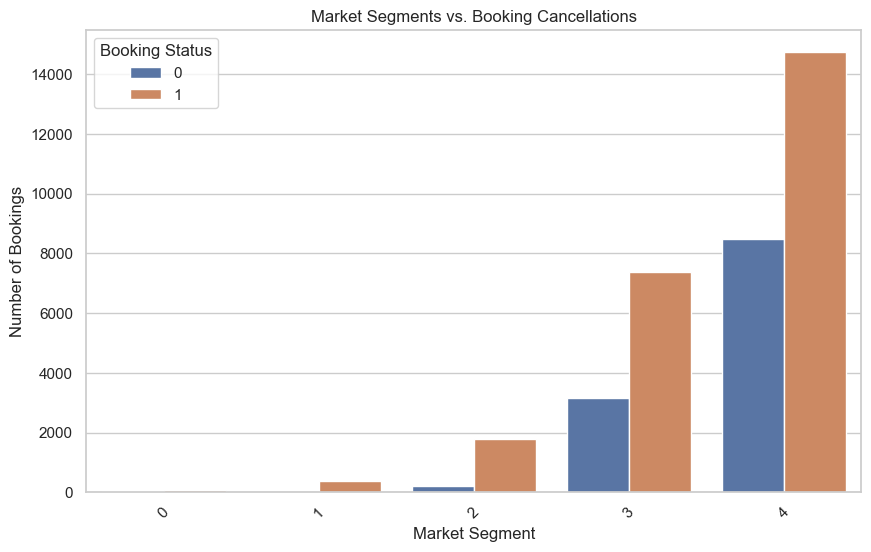

In [57]:
# 11. Market Segments Contributing to Hotel Bookings and Cancellation Rates
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel_data, x='market_segment_type', hue='booking_status')
plt.title('Market Segments vs. Booking Cancellations')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 12. Influence of Car Parking Space Requirement on Booking Cancellations
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='required_car_parking_space', hue='booking_status')
plt.title('Car Parking Requirement vs. Booking Cancellations')
plt.xlabel('Car Parking Required')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()

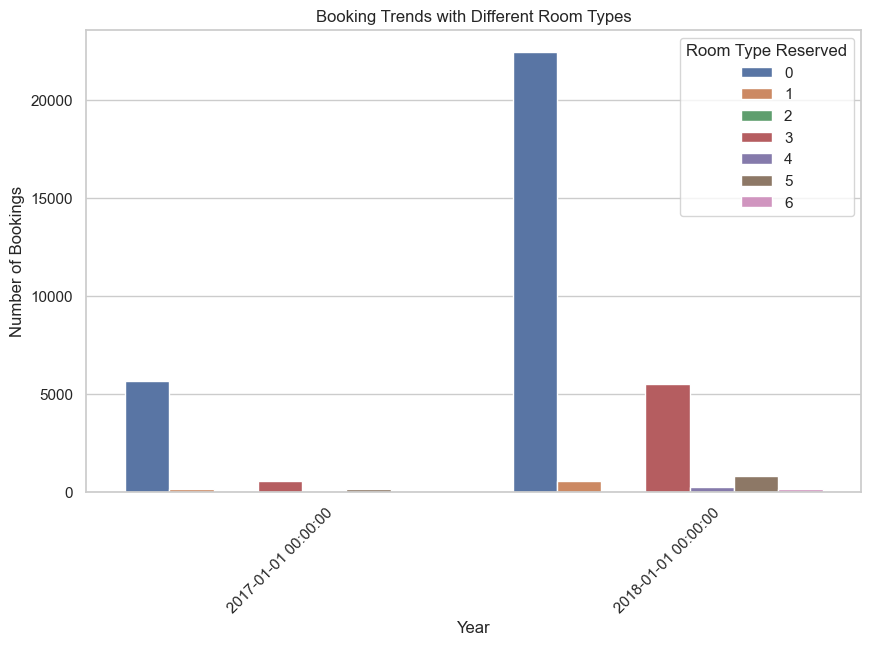

In [58]:
# 13. Booking Trends with Different Room Types
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel_data, x='arrival_year', hue='room_type_reserved')
plt.title('Booking Trends with Different Room Types')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title='Room Type Reserved')
plt.xticks(rotation=45)
plt.show()



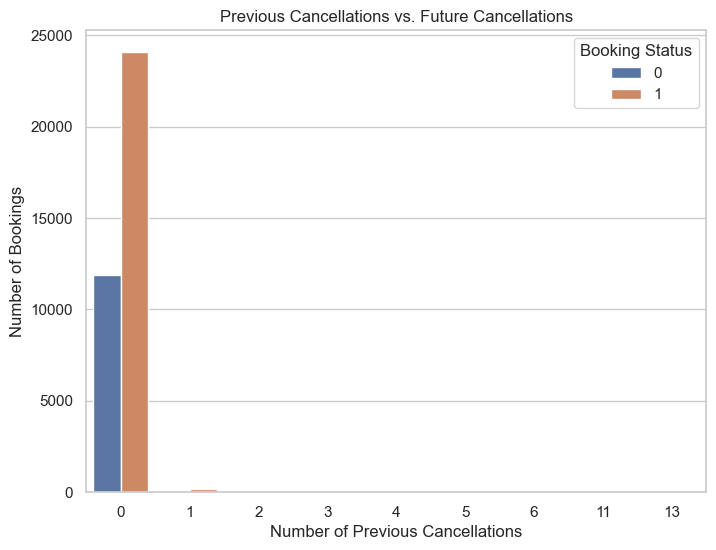

In [59]:
# 14. Relationship between Previous Cancellations and Likelihood of Future Cancellations
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel_data, x='no_of_previous_cancellations', hue='booking_status')
plt.title('Previous Cancellations vs. Future Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()


C:\Users\Maria Computer\AppData\Local\Temp\ipykernel_572\2944812944.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hotel_data, x='market_segment_type', y='lead_time', ci=None)


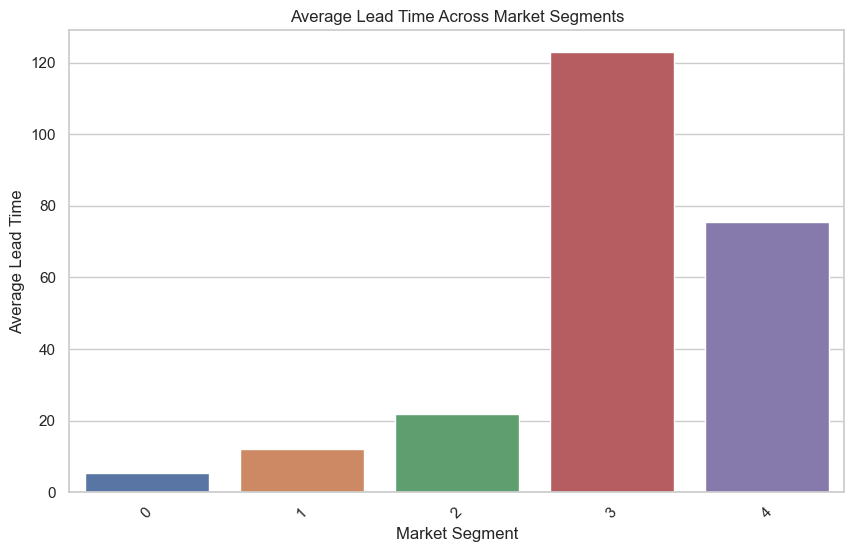

In [60]:
# 15. Variation in Average Lead Time Across Different Market Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=hotel_data, x='market_segment_type', y='lead_time', ci=None)
plt.title('Average Lead Time Across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.show()
